# Knowing the Covertype dataset

## Description

The Covertype dataset aims to provide cartographic variables (no remotely sensed data) for predicting forest cover types. Data is about four wilderness areas located in the Roosevelt National Forest of northern Colorado, whose cover types are more a result of ecological processes rather than human-caused disturbances.

The original dataset contains 12 attributes (10 quantitative, 2 qualitative), but the collected data is organized in 54 columns, where 10 correspond to the quantitative variables, 4 are binary for encoding wilderness areas and 40 are also binary for encoding the soil type. A more detailed description is given in the table below:

| Attribute name           | Type             | Measurement    | Description                          |
| ------------------------ |:-----------------|:---------------|-------------------------------------:|
| elevation                | quantitative     | meters         | Elevation in meters                  |
| aspect                   | quantitative     | azimuth        | Aspect in degress azimuth            |
| slope                    | quantitative     | degrees        | Slope in degress                     |
| horiz_dist_hydro         | quantitative     | meters         | Horiz. Dist. to nearest surface water|    
| vert_dist_hydro          | quantitative     | meters         | Vert. Dist. to nearest surface water |    
| horiz_dist_road          | quantitative     | meters         | Horiz. Dist. to nearest roadway      |    
| hillshade_9              | quantitative     | 0 to 255 index | Hillshade index at 9am, summer solstice|
| hillshade_noon              | quantitative     | 0 to 255 index | Hillshade index at noon, summer solstice|
| hillshade_15              | quantitative     | 0 to 255 index | Hillshade index at 3pm, summer solstice|
| horiz_dist_fire          | quantitative     | meters         | Horiz. Dist. to nearest wildfire ignition points |    
| wild_area[0-4]           | qualitative (4 classes)     | binary         | Wilderness area designation          |
| soil_type[0-39]          | qualitative (40 classes)     | binary         | Soil type designation                |
| cover_type               | integer          | 1 to 7         | Forest cover type designation        |

The classification problem consists in classifying the forest cover into seven types:

| Number | Type |           |
| -------|------|-----------|
| 1      | Spruce/Fir|<img src="imgs/spruce.jpg" width="150px" height="150px"/>|
| 2      | Lodgepole Pine|<img src="imgs/lodge.jpg" width="150px" height="150px"/>|
| 3      | Ponderosa Pine|<img src="imgs/ponderosa.jpg" width="150px" height="150px"/>|
| 4      | Cottonwood/Willow|<img src="imgs/cottonwood.jpg" width="150px" height="150px"/>|
| 5      | Aspen|<img src="imgs/aspen.jpg" width="150px" height="150px"/>|
| 6      | Douglas-fir|<img src="imgs/douglas.jpg" width="150px" height="150px"/>|
| 7      | Krummholz|<img src="imgs/krumm.jpg" width="150px" height="150px"/>|

## Loading and improving columns description

Below is the code for loading and previewing the raw dataset using the `pandas` library:

In [1]:
import pandas as pd
# read data as csv
dataset = pd.read_csv("datasets/covtype.data", header=None)
# preview the five first lines
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


Notice that the header doesn't exist in the original dataset, so the column indexing must be done only with integers. It is possible to improve this by changing the column indices to a more readable form:

In [2]:
# list of column names
column_names = ["elevation", "aspect", "slope", \
                "horiz_dist_hydro", "vert_dist_hydro", \
                "horiz_dist_road", "hillshade_9", \
                "hill_shade_noon", "hill_shade_15", "horiz_dist_fire"] \
                + ["wild_area_" + str(i) for i in range(0,4)] \
                + ["soil_type_" + str(i) for i in range(0,40)] \
                + ["cover_type"]
# change column names in dataframe
dataset.columns = column_names
# confirm the dataset size
print("Dataset shape: " + str(dataset.shape))
# check the resulting dataset with column names
dataset.head()

Dataset shape: (581012, 55)


,elevation,aspect,slope,horiz_dist_hydro,vert_dist_hydro,horiz_dist_road,hillshade_9,hill_shade_noon,hill_shade_15,horiz_dist_fire,...,soil_type_31,soil_type_32,soil_type_33,soil_type_34,soil_type_35,soil_type_36,soil_type_37,soil_type_38,soil_type_39,cover_type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


## Dealing with class imbalancing

This is the distribution of rows per classes:

| Type | Number of rows |
| -----|----------------|
| Spruce/Fir | 211840|
| Lodgepole Pine| 283301|
| Ponderosa Pine | 35754|
| Corronwood/Willow| 2747|
| Aspen | 9493|
| Douglas-fir | 17367|
| Krummholz | 20510|
| **Total** | **581012**|

One can notice that this is a very unbalanced dataset, since there is a huge difference between the amount of individuals between classes. Since this dataset has a lot of instances and the minimum of the number of instances in a class seems still to be substantial, the dataset will be reduced in a way that every class will have 2747 instances. In this work, random 2747 instances in each class will be selected, and the rest will be kept in another dataset. The code below does the job:

In [3]:
from sklearn.utils import resample
# group by cover type
groups = dataset.groupby("cover_type")
# get minimum number of instances in a class
number_samples = groups.size().min()
# produce the new dataset
new_dataset = pd.concat([resample(df, replace=True, \
                                  n_samples=number_samples, \
                                  random_state=123) for _, df in groups])
# keeps the remaining dataset
remaining_dataset = pd.concat([dataset, new_dataset]).drop_duplicates(keep=False)
# check sizes
print("New dataset shape:" + str(new_dataset.shape))
print("Remaining dataset shape:" + str(remaining_dataset.shape))

/home/vitorgreati/miniconda3/envs/ia/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


New dataset shape:(19229, 55)
Remaining dataset shape:(563676, 55)


## Missing values analysis

There are no missing values in this dataset. In order to check this fact, it is possible to use the `missingno` library to generate a simple visualization of the new dataset (the dataset of remaining instances would behave the same), where the color white means missing values in a column (notice how everything is dark for this dataset):

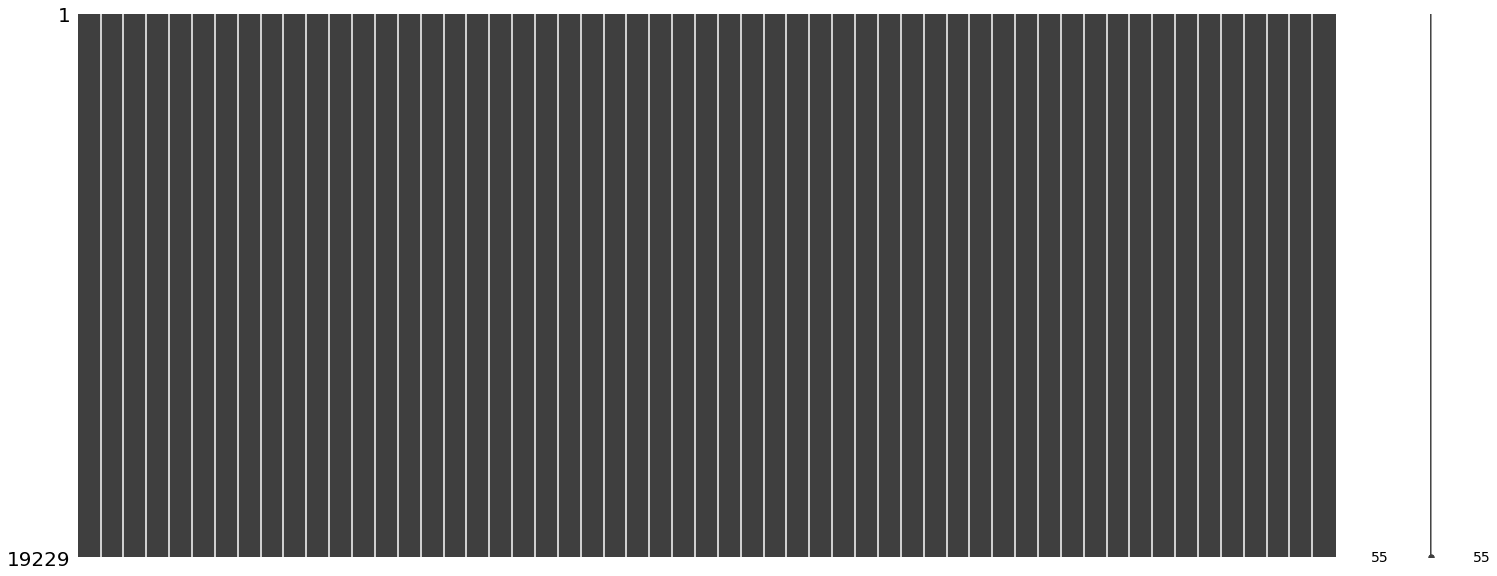

In [4]:
import missingno as msno
# improve plotting visualization
%matplotlib inline
# plot a graph showing the missing values (in this case, there are none)
msno.matrix(new_dataset)

## Separate features and targets

For further manipulations, lets separate targets from features:

In [5]:
# Retrieve targets
targets = new_dataset['cover_type']
# Retrieve features
features_data = new_dataset.drop('cover_type', axis=1, inplace=False)
# Check shapes
print("Target size: " + str(targets.shape))
print("Data size: " + str(features_data.shape))

Target size: (19229,)
Data size: (19229, 54)


## Train and test separation

In several Machine Learning methods, it is important to split the dataset into test and train data:

In [6]:
from sklearn.model_selection import train_test_split
# Split data into train and test sets
train_features, test_features, train_targets, test_targets  = train_test_split(
    features_data, 
    targets,
    test_size=0.25,
    train_size=0.75,
    random_state=42)
# Check shapes
print("Train features: " + str(train_features.shape))
print("Train targets: " + str(train_targets.shape))
print("Test features: " + str(test_features.shape))
print("Test targets: " + str(test_targets.shape))
# Check head
print("\n[INFO] Train features sample")
print(train_features.head())
print("\n[INFO] Train targets sample")
print(train_targets.head())

Train features: (14421, 54)
Train targets: (14421,)
Test features: (4808, 54)
Test targets: (4808,)

[INFO] Train features sample
        elevation  aspect  slope  horiz_dist_hydro  vert_dist_hydro  \
246630       1936     320     26                30               21   
362439       3439     338     15               582               80   
523123       3338      86     25               190               45   
25512        2574     341     14                 0                0   
137946       2928     346      6               162               20   

        horiz_dist_road  hillshade_9  hill_shade_noon  hill_shade_15  \
246630               85          143              204            196   
362439             1921          186              217            170   
523123             2172          247              189             57   
25512              1332          191              219            167   
137946             5055          209              231            160   

        ho

## Data normalization

Also, in order to avoid future problems with data magnitude, normalization is applied in the train set.
Here, the `StandardScaler` class is responsible for that, whose effect is to remove the mean and scale
to unit variance:

In [7]:
from sklearn.preprocessing import StandardScaler
# Keep columns index to use later
(feature_columns, feature_index) = (train_features.columns, train_features.index)
# Retrieve only the values
features_data_values = train_features.values
# Build the normalizer
scaler = StandardScaler().fit(features_data_values)
# Standardize data
features_data_values = scaler.transform(features_data_values)
# Back features to DataFrame
train_features = pd.DataFrame(features_data_values, columns=feature_columns, index=feature_index)
# Check first row
# Check head
print("\n[INFO] Train features sample")
print(train_features.head())
print("\n[INFO] Train targets sample")
print(train_targets.head())


[INFO] Train features sample
        elevation    aspect     slope  horiz_dist_hydro  vert_dist_hydro  \
246630  -1.929805  1.477831  1.116461         -0.948019        -0.487945   
362439   1.644997  1.640937 -0.184168          1.692577         0.475531   
523123   1.404774 -0.642539  0.998222         -0.182629        -0.096023   
25512   -0.412357  1.668121 -0.302407         -1.091529        -0.830878   
137946   0.429612  1.713428 -1.248319         -0.316572        -0.504275   

        horiz_dist_road  hillshade_9  hill_shade_noon  hill_shade_15  \
246630        -1.219708    -2.282350        -0.643397       1.322887   
362439         0.161461    -0.874140        -0.075690       0.761317   
523123         0.350281     1.123554        -1.298443      -1.679356   
25512         -0.281626    -0.710395         0.011650       0.696520   
137946         2.519079    -0.120911         0.535686       0.545328   

        horiz_dist_fire      ...       soil_type_30  soil_type_31  \
246630     

/home/vitorgreati/miniconda3/envs/ia/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Dumping scaler

It is important to save the scaler since it is a model for normalizing the data based on the
train set and may be used for transforming future data:

In [8]:
from sklearn.externals import joblib
# Save the scaler in the models/ folder
joblib.dump(scaler, 'models/scaler.save')

['models/scaler.save']

### Transforming the test set

Now, apply the normalization in the test set. Let's simulate the loading process of the scaler, like in a real situation of confronting new data samples:

In [9]:
# Load the scaler
scaler = joblib.load('models/scaler.save')
# Keep columns index to use later
(feature_columns, feature_index) = (test_features.columns, test_features.index)
# Apply normalization in test set
test_features_values = scaler.transform(test_features.values)
# Back to DataFrame
test_features = pd.DataFrame(test_features_values, columns=feature_columns, index=feature_index)
# Check first row
test_features.head()
# Check head
print("\n[INFO] Train features sample")
print(test_features.head())
print("\n[INFO] Train targets sample")
print(test_targets.head())


[INFO] Train features sample
        elevation    aspect     slope  horiz_dist_hydro  vert_dist_hydro  \
43354    0.572319 -0.932504 -0.420646          1.175939         0.295900   
11345   -0.336247 -0.497556 -1.011841         -0.077388        -0.749227   
260737   1.212120 -1.240592 -1.248319          0.190499        -0.340974   
574033  -0.079375  0.671366 -0.893602          0.066123         0.932774   
366456   1.235905 -1.122794  0.288788          0.343577         0.834793   

        horiz_dist_road  hillshade_9  hill_shade_noon  hill_shade_15  \
43354          2.560454     0.468572        -0.337708      -0.426622   
11345         -0.823261     0.697816         0.492017      -0.145836   
260737         1.983462     0.108332         0.404677       0.307740   
574033         0.676015    -0.251907         1.321742       0.977305   
366456         1.313941     0.010085        -1.080094      -0.534616   

        horiz_dist_fire      ...       soil_type_30  soil_type_31  \
43354      

/home/vitorgreati/miniconda3/envs/ia/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Save the new datasets

After generating the train and test datasets, and the dataset with the remaining values, their csv versions need to be stored, in order to use them in the next steps of this work:

In [10]:
# Join features and targets
train_set = pd.concat([train_features, train_targets], axis=1)
test_set = pd.concat([test_features, test_targets], axis=1)
# Check shapes
print("Train shape: " + str(train_set.shape))
print("Test shape: " + str(test_set.shape))
# Save datasets
print("[INFO] Saving train...")
train_set.to_csv("datasets/covertype_norm_train.csv", index=False)
print("[INFO] Saving test...")
test_set.to_csv("datasets/covertype_norm_test.csv", index=False)
print("[INFO] Done.")

Train shape: (14421, 55)
Test shape: (4808, 55)
[INFO] Saving train...
[INFO] Saving test...
[INFO] Done.


Also, save the remaining data from the dataset for future usage (check if this file already exists, otherwise it is not necessary to run the next cell):

In [ ]:
print("[INFO] Saving remaining...")
remaining_dataset.to_csv("datasets/covertype_remaining.csv", index=False)
print("[INFO] Done.")